# AOS: read the gen2 repo and see the results:

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
from astropy.table import Table
from astropy.coordinates import SkyCoord
import lsst.daf.persistence as dafPersist


dataRoot = '/project/scichris/aos/perturbations/imgCloseLoop_DM-30128/input/'
repoRoot = os.path.join(dataRoot, 'rerun/run1') 
butler = dafPersist.Butler(repoRoot, )
iterNum=0
visit = f'40211231060{iterNum}2'
data_id = {'visit': int(visit), 'filter': 'g', 'raftName': 'R22', 
                       'detectorName': 'S22', 'detector': 98
               }

exposure = butler.get('postISRCCD', **data_id) 
image = exposure.image.array



<ipython-input-2-da20434ff3fa>:14: FutureWarning: Gen2 Butler has been deprecated (Butler). It will be removed sometime after v23.0 but no earlier than the end of 2021.
  butler = dafPersist.Butler(repoRoot, )
<ipython-input-2-da20434ff3fa>:14: FutureWarning: Gen2 Butler has been deprecated (LsstCamMapper). It will be removed sometime after v23.0 but no earlier than the end of 2021.
  butler = dafPersist.Butler(repoRoot, )


Show the donut:

Text(0, 0.5, 'y [px]')

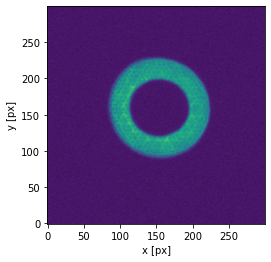

In [8]:
fig,ax = plt.subplots(1,1, figsize=(4,4))
xmin,xmax = 2250,2550
ymin,ymax = 1300,1600
    
ax.imshow(image[ymin:ymax,xmin:xmax], origin='lower',  vmax=500)
ax.set_xlabel('x [px]')
ax.set_ylabel('y [px]')

## compare to the wcs 

Text(0, 0.5, 'y [px]')

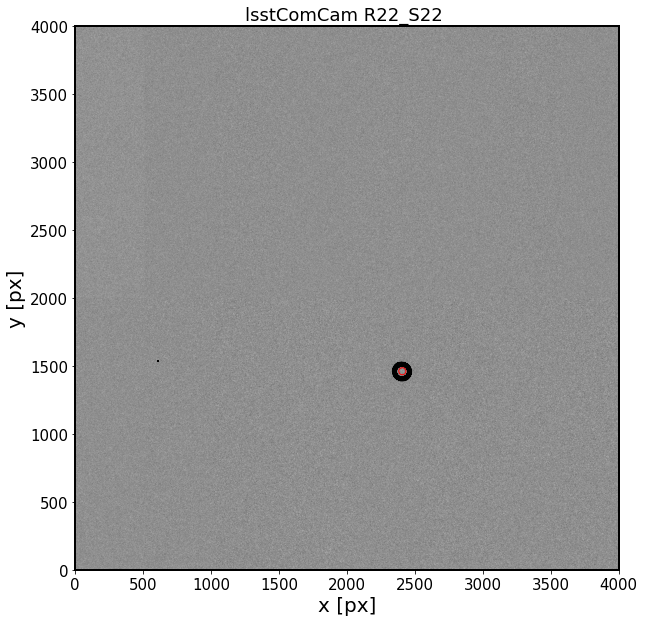

In [26]:
%matplotlib inline
import pandas as pd
import numpy as np
import os

import lsst.geom
import lsst.daf.persistence as dafPersist

import matplotlib.pyplot as plt
from astropy.visualization import ZScaleInterval
zscale = ZScaleInterval()
from matplotlib import rcParams 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18



dataRoot = '/project/scichris/aos/perturbations/imgCloseLoop_DM-30128/'
repoRoot = os.path.join(dataRoot, 'input/rerun/run1') 
butler = dafPersist.Butler(repoRoot, )
iterNum=0
visit = f'40211231060{iterNum}2'
data_id = {'visit': int(visit), 'filter': 'g', 'raftName': 'R22', 
                       'detectorName': 'S22', 'detector': 98
               }

exposure = butler.get('postISRCCD', **data_id) 

# read in the input instance catalog 
cat = np.genfromtxt(os.path.join(dataRoot, 'skyInfo.txt'),
                        skip_header=1)

cat_df = pd.DataFrame(cat, columns=['id', 'ra', 'dec', 'g'])


# get the wcs 
wcs = exposure.getWcs()

# calculate the position given the x,y 
x,y = wcs.skyToPixelArray(cat_df['ra'], cat_df['dec'],degrees=True)

    
# plot the WCS-inferred stellar position on top of the data 
data = exposure.image.array
vmin, vmax = zscale.get_limits(data)

fig = plt.figure(figsize=(10,10))
plt.imshow(data, vmin=vmin, vmax=vmax,cmap='Greys')
plt.scatter(x,y,  facecolors='none', edgecolors='r', marker='o',s=50, )
plt.xlim(0, 4000)
plt.ylim(0, 4000)
plt.title(f"lsstComCam {exposure.getDetector().getName()} ")
plt.xlabel('x [px]')
plt.ylabel('y [px]')
